# **Preprocessing and Data Cleaning**

In [93]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [94]:
# providing path in which different sales data is stored and combining in a single file "data_list"
data_path = r'D:\Python\PKC_23\Exploratory_Data_Analysis_Sales\sales-data'
data_list=[]
for file in os.listdir(data_path):
    data_list.append(pd.read_csv(os.path.join(data_path,file)))
data_frame= pd.concat(data_list)

In [95]:
data_frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [96]:
# gives data overview
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205233 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          204629 non-null  object
 1   Product           204629 non-null  object
 2   Quantity Ordered  204629 non-null  object
 3   Price Each        204629 non-null  object
 4   Order Date        204629 non-null  object
 5   Purchase Address  204629 non-null  object
dtypes: object(6)
memory usage: 11.0+ MB


In [97]:
#count null values
data_frame.isnull().sum()

Order ID            604
Product             604
Quantity Ordered    604
Price Each          604
Order Date          604
Purchase Address    604
dtype: int64

In [98]:
#count duplicate values
data_frame.duplicated().sum()

19545

In [99]:
# count duplicate order ID
data_frame[data_frame.duplicated(subset=['Order ID'])].shape

(26794, 6)

In [100]:
#show duplicate order ID
data_frame[data_frame['Order ID'].duplicated(keep=False)].sort_values(by=['Order ID'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301"
42,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301"
58,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001"
57,141290,Apple Airpods Headphones,1,150,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001"
134,141365,Wired Headphones,1,11.99,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001"
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# cells with order ID = Nan
data_frame[data_frame['Order ID'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
#drop all NaN values
df2= data_frame.dropna()

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204629 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          204629 non-null  object
 1   Product           204629 non-null  object
 2   Quantity Ordered  204629 non-null  object
 3   Price Each        204629 non-null  object
 4   Order Date        204629 non-null  object
 5   Purchase Address  204629 non-null  object
dtypes: object(6)
memory usage: 10.9+ MB


In [104]:
# null values is dataFrame "df2"
df2.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [105]:
# count duplicate values
df2.duplicated().sum()

18942

In [106]:
# display all order IDs with duplicate entries
df2[df2['Order ID'].duplicated(keep=False)].sort_values(by=['Order ID'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301"
42,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301"
58,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001"
57,141290,Apple Airpods Headphones,1,150,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001"
134,141365,Wired Headphones,1,11.99,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001"
...,...,...,...,...,...,...
1620,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1726,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2945,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2129,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [107]:
#display all values with order ID as order ID
df2[df2['Order ID']=='Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [108]:
#delete entries with wrong Order ID
df2= df2[df2['Order ID']!='Order ID']

In [109]:
df2[df2['Order ID']=='Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204239 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          204239 non-null  object
 1   Product           204239 non-null  object
 2   Quantity Ordered  204239 non-null  object
 3   Price Each        204239 non-null  object
 4   Order Date        204239 non-null  object
 5   Purchase Address  204239 non-null  object
dtypes: object(6)
memory usage: 10.9+ MB


In [111]:
#converting "Quantity Ordered", "Price Each" & "Order Date" datatypes
df2['Quantity Ordered']= pd.to_numeric(df2['Quantity Ordered'])
df2['Price Each']= pd.to_numeric(df2['Price Each'])
df2['Order Date']= pd.to_datetime(df2['Order Date'])

C:\Users\ND.COM\AppData\Local\Temp\ipykernel_15884\1640591185.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Order Date']= pd.to_datetime(df2['Order Date'])


In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204239 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          204239 non-null  object        
 1   Product           204239 non-null  object        
 2   Quantity Ordered  204239 non-null  int64         
 3   Price Each        204239 non-null  float64       
 4   Order Date        204239 non-null  datetime64[ns]
 5   Purchase Address  204239 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 10.9+ MB


In [113]:
#show duplicate values
df2[df2['Order ID'].duplicated(keep=False)].sort_values(by=['Order ID'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001"
...,...,...,...,...,...,...
25028,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035"
25040,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001"
25041,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001"
25076,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301"


In [114]:
#add "Month" and "Sales" column to analyze the sales in respective month
df2['Month']= df2['Order Date'].dt.month
df2['Sales']= df2['Quantity Ordered']*df2['Price Each'] 

In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204239 entries, 0 to 11685
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          204239 non-null  object        
 1   Product           204239 non-null  object        
 2   Quantity Ordered  204239 non-null  int64         
 3   Price Each        204239 non-null  float64       
 4   Order Date        204239 non-null  datetime64[ns]
 5   Purchase Address  204239 non-null  object        
 6   Month             204239 non-null  int32         
 7   Sales             204239 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 13.2+ MB


In [116]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [117]:
# splits "Purchase Address" with comma and returns second element (index 1) which is a city name
def get_city(address):
    return address.split(',')[1]
# splits "Purchase Address" with comma and return third element (index 2 ) whcih is a state and post code
# the second split, splits the state and postcode with "spaces" and returns first element (index 1) which is state 
def get_state(address):
    return address.split(',')[2].split(' ')[1]

#combine city and state in a new column named "City"
df2['City'] =  df2['Purchase Address'].apply(lambda address: get_city( address) + " " + "(" + get_state(address) + ")")


In [118]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# **Business Questions**

## Highest Monthly Sales

In [119]:
Monthly_Sales = df2.groupby('Month')[['Sales', 'Quantity Ordered', 'Price Each']].sum()
Monthly_Sales

,Sales,Quantity Ordered,Price Each
Month,,,
1,1822256.73,10903,1811768.38
2,2202022.42,13449,2188884.72
3,2807100.38,17005,2791207.83
4,6776170.06,41097,6730174.61
5,3163166.04,18696,3145680.58
6,2577802.26,15253,2562025.61
7,2647775.76,16072,2632539.56
8,2244467.88,13448,2230345.42
9,2097560.13,13109,2084992.09


In [120]:
#convert Month column to respective name
import calendar
Monthly_Sales.index= Monthly_Sales.index.map(lambda x: calendar.month_name[x])
Monthly_Sales.head()

,Sales,Quantity Ordered,Price Each
Month,,,
January,1822256.73,10903,1811768.38
February,2202022.42,13449,2188884.72
March,2807100.38,17005,2791207.83
April,6776170.06,41097,6730174.61
May,3163166.04,18696,3145680.58


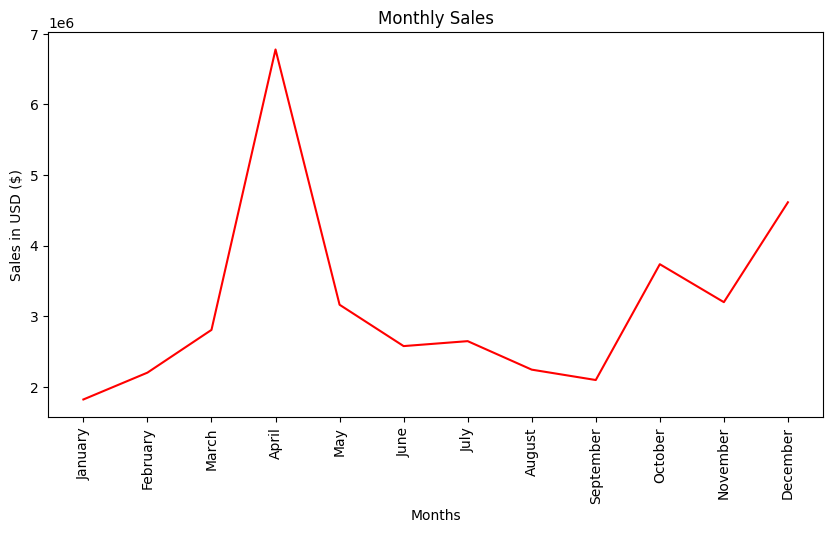

In [121]:
#plot line graph of sales over months
plt.figure(figsize=(10,5))
plt.plot(Monthly_Sales.index, Monthly_Sales['Sales'], color='r')
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.title('Monthly Sales')
plt.show()


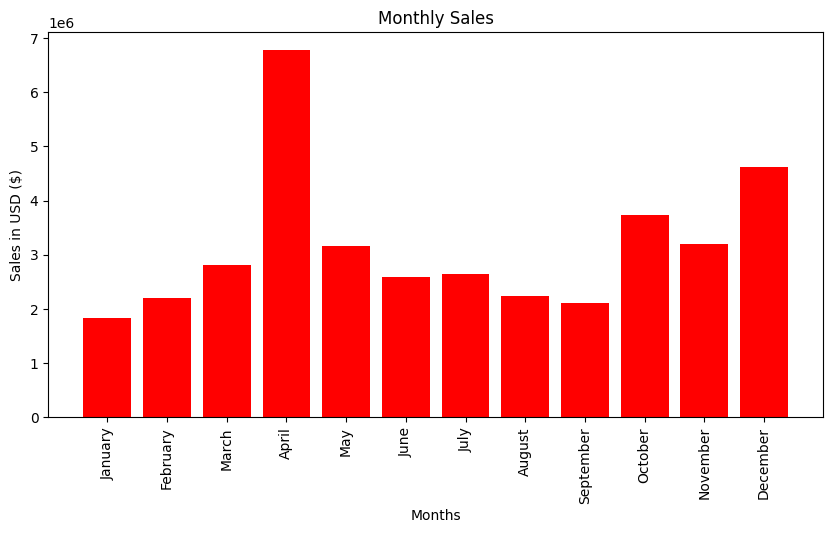

In [122]:
#plot sales bar graph with
plt.figure(figsize=(10,5))
plt.bar(Monthly_Sales.index, Monthly_Sales['Sales'], color='r')
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.title('Monthly Sales')
plt.show()


## City wise Sales

In [123]:
sales_city = df2.groupby('City')[['Sales', 'Quantity Ordered', 'Price Each']].sum()
sales_city

,Sales,Quantity Ordered,Price Each
City,,,
Atlanta (GA),3079953.50,18235,3062788.08
Austin (TX),1992265.34,12245,1981361.26
Boston (MA),4015522.17,24718,3989152.52
Dallas (TX),3020815.87,18249,3004316.86
Los Angeles (CA),6003969.87,36688,5969426.25
New York City (NY),5110905.21,30673,5077763.51
Portland (ME),492294.76,3015,489559.54
Portland (OR),2069323.96,12437,2058280.85
San Francisco (CA),9079278.68,55226,9021800.05


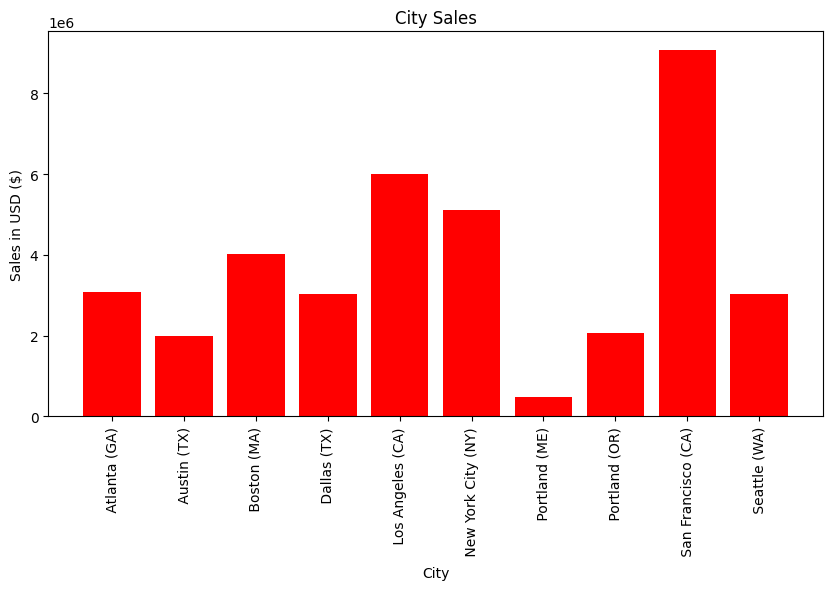

In [124]:
#visualize sales in each city
plt.figure(figsize=(10,5))
plt.bar(sales_city.index, sales_city['Sales'], color='r')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.title('City Sales')
plt.show()


## Best time to run ads

In [125]:
#create columns named Hour and minutes to analyze the time most orders received
df2['Hour']= df2['Order Date'].dt.hour
df2['Minute']= df2['Order Date'].dt.minute

In [126]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [127]:
#returns the number of orders in each hour
order_by_hour = df2.groupby('Hour')[['Quantity Ordered']].count()
order_by_hour


,Quantity Ordered
Hour,
0,4288
1,2594
2,1375
3,916
4,938
5,1464
6,2736
7,4395
8,6899


In [128]:
order_by_hour.max()

Quantity Ordered    14191
dtype: int64

In [129]:
order_by_hour.min()

Quantity Ordered    916
dtype: int64

In [130]:
#return time when max orders received
order_by_hour[order_by_hour['Quantity Ordered']==order_by_hour.max()[0]]
 

,Quantity Ordered
Hour,
19,14191


In [131]:
#min orders time
order_by_hour[order_by_hour['Quantity Ordered']==order_by_hour.min()[0]]

,Quantity Ordered
Hour,
3,916


In [132]:
order_by_hour.describe()

,Quantity Ordered
count,24.000000
mean,8509.958333
std,4887.857977
min,916.000000
25%,3900.000000
50%,10416.000000
75%,12402.250000
max,14191.000000


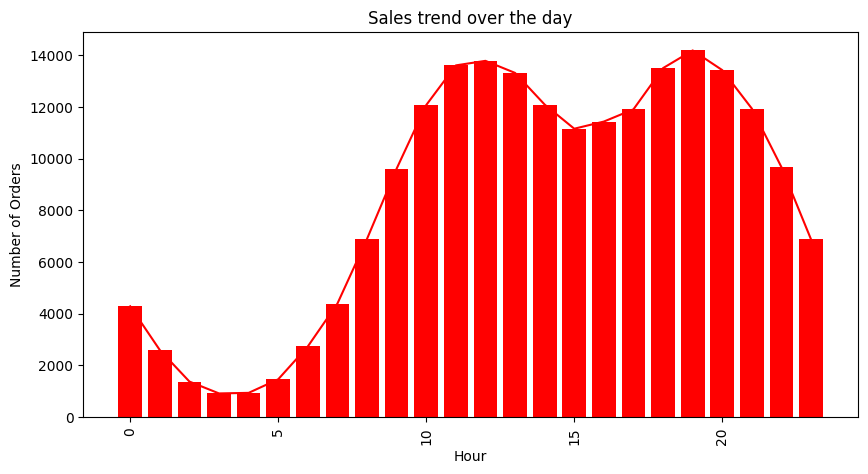

In [133]:
#plot line graph and bar chart to display the number of orders over the day
plt.figure(figsize=(10,5))
plt.plot(order_by_hour.index, order_by_hour['Quantity Ordered'], color='r')
plt.bar(order_by_hour.index, order_by_hour['Quantity Ordered'], color='r')
plt.xticks(rotation=90)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Sales trend over the day')
plt.show()





## Combination of products often sold together

In [134]:
#If two or more product has same order ID and same order date they are bought together
#find duplicate orders ID
duplicate_ID = df2[df2[['Order ID', 'Order Date']].duplicated(keep=False)].sort_values(by=['Order ID'])
duplicate_ID.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin (TX),16,6
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin (TX),16,6
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles (CA),8,25
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles (CA),8,25
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11.99,New York City (NY),11,19
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City (NY),11,19
154,141384,USB-C Charging Cable,1,11.95,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,11.95,Boston (MA),0,14
153,141384,Google Phone,1,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,600.00,Boston (MA),0,14
221,141450,Bose SoundSport Headphones,1,99.99,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,99.99,San Francisco (CA),11,16
220,141450,Google Phone,1,600.00,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,600.00,San Francisco (CA),11,16


In [135]:
duplicate_ID.shape

(49758, 11)

In [136]:
#count the  number of orders the same order ID has
duplicate_ID['Order ID'].value_counts()


Order ID
193511    8
178158    8
187636    6
188097    6
182908    6
         ..
183301    2
183300    2
183299    2
183298    2
319631    2
Name: count, Length: 23956, dtype: int64

In [137]:
#check what products bought by order ID 193511
df2[df2['Order ID']=='193511']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
17767,193511,Google Phone,1,600.00,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",4,600.00,Austin (TX),11,14
17768,193511,USB-C Charging Cable,2,11.95,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",4,23.90,Austin (TX),11,14
17769,193511,Bose SoundSport Headphones,1,99.99,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",4,99.99,Austin (TX),11,14
17770,193511,Wired Headphones,1,11.99,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",4,11.99,Austin (TX),11,14
17767,193511,Google Phone,1,600.00,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",4,600.00,Austin (TX),11,14
17768,193511,USB-C Charging Cable,2,11.95,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",4,23.90,Austin (TX),11,14
17769,193511,Bose SoundSport Headphones,1,99.99,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",4,99.99,Austin (TX),11,14
17770,193511,Wired Headphones,1,11.99,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",4,11.99,Austin (TX),11,14


In [138]:
#calculates how much order ID 193511 has spent
df2[df2['Order ID']=='193511']['Sales'].sum()

1471.76

In [139]:
#return maximum sales and its Product for order ID 193511
df2[df2['Order ID']=='193511'].groupby('Product')['Sales'].sum().sort_values(ascending=False).head(1)

Product
Google Phone    1200.0
Name: Sales, dtype: float64

In [140]:
#find the most expensive product
df2[df2['Sales']==df2['Sales'].max()].head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
4717,181069,Macbook Pro Laptop,2,1700.0,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",4,3400.0,San Francisco (CA),21,1
5219,181544,Macbook Pro Laptop,2,1700.0,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",4,3400.0,New York City (NY),12,48
4717,181069,Macbook Pro Laptop,2,1700.0,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",4,3400.0,San Francisco (CA),21,1
5219,181544,Macbook Pro Laptop,2,1700.0,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",4,3400.0,New York City (NY),12,48
385,210292,Macbook Pro Laptop,2,1700.0,2019-06-08 09:00:00,"953 Ridge St, San Francisco, CA 94016",6,3400.0,San Francisco (CA),9,0
6776,200528,Macbook Pro Laptop,2,1700.0,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",5,3400.0,Boston (MA),13,40


In [141]:
df2['Price Each'].describe()

count    204239.000000
mean        184.402537
std         332.568136
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        1700.000000
Name: Price Each, dtype: float64

In [142]:
#return the laptop sale in April
df2[(df2['Month']==4) & (df2['Product']=='Macbook Pro Laptop')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.0,San Francisco (CA),10,38
86,176639,Macbook Pro Laptop,1,1700.0,2019-04-28 16:14:00,"853 Cedar St, San Francisco, CA 94016",4,1700.0,San Francisco (CA),16,14
90,176643,Macbook Pro Laptop,1,1700.0,2019-04-27 21:32:00,"373 Adams St, Boston, MA 02215",4,1700.0,Boston (MA),21,32
93,176646,Macbook Pro Laptop,1,1700.0,2019-04-22 07:14:00,"657 Adams St, Portland, OR 97035",4,1700.0,Portland (OR),7,14
136,176687,Macbook Pro Laptop,1,1700.0,2019-04-30 10:26:00,"121 Wilson St, Los Angeles, CA 90001",4,1700.0,Los Angeles (CA),10,26
...,...,...,...,...,...,...,...,...,...,...,...
18161,193885,Macbook Pro Laptop,1,1700.0,2019-04-16 08:47:00,"837 6th St, Austin, TX 73301",4,1700.0,Austin (TX),8,47
18173,193897,Macbook Pro Laptop,1,1700.0,2019-04-16 19:19:00,"489 Chestnut St, Los Angeles, CA 90001",4,1700.0,Los Angeles (CA),19,19
18254,193972,Macbook Pro Laptop,1,1700.0,2019-04-11 16:23:00,"334 5th St, San Francisco, CA 94016",4,1700.0,San Francisco (CA),16,23
18303,194019,Macbook Pro Laptop,1,1700.0,2019-04-20 11:44:00,"418 Maple St, Seattle, WA 98101",4,1700.0,Seattle (WA),11,44


In [143]:
duplicate_ID.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin (TX),16,6
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin (TX),16,6
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles (CA),8,25
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles (CA),8,25
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11.99,New York City (NY),11,19


In [144]:
#group products having same Order ID in a new column
duplicate_ID['Grouped']= duplicate_ID.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [145]:
duplicate_ID.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin (TX),16,6,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin (TX),16,6,"USB-C Charging Cable,Wired Headphones"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles (CA),8,25,"AA Batteries (4-pack),Apple Airpods Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles (CA),8,25,"AA Batteries (4-pack),Apple Airpods Headphones"
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11.99,New York City (NY),11,19,"Wired Headphones,Vareebadd Phone"


In [146]:
#drop duplicate values
duplicate_ID= duplicate_ID[['Order ID', 'Grouped']].drop_duplicates()
duplicate_ID.head(20)

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
58,141290,"AA Batteries (4-pack),Apple Airpods Headphones"
134,141365,"Wired Headphones,Vareebadd Phone"
154,141384,"USB-C Charging Cable,Google Phone"
221,141450,"Bose SoundSport Headphones,Google Phone"
228,141457,"iPhone,Apple Airpods Headphones"
250,141478,"Google Phone,Apple Airpods Headphones"
323,141550,"iPhone,Apple Airpods Headphones,Wired Headphones"
362,141587,"USB-C Charging Cable,Apple Airpods Headphones"
422,141645,"Wired Headphones,Lightning Charging Cable"


In [147]:
duplicate_ID.shape

(23956, 2)

In [148]:
#display frequently bought items together
from itertools import combinations
from collections import Counter
count= Counter()
for row in duplicate_ID['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))
    # print(count)
for key, value in count.most_common(10):
    print(key, value)


('Lightning Charging Cable', 'Lightning Charging Cable') 2273
('USB-C Charging Cable', 'USB-C Charging Cable') 2139
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 2107
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 2049
('Wired Headphones', 'Wired Headphones') 1928
('Apple Airpods Headphones', 'Apple Airpods Headphones') 1545
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1313
('iPhone', 'Lightning Charging Cable') 906
('Google Phone', 'USB-C Charging Cable') 901
('27in FHD Monitor', '27in FHD Monitor') 743


In [149]:
#display 3 items bought together

count= Counter()
for row in duplicate_ID['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,3)))
    # print(count)
for key, value in count.most_common(10):
    print(key, value)
   

('iPhone', 'Lightning Charging Cable', 'iPhone') 86
('USB-C Charging Cable', 'Google Phone', 'USB-C Charging Cable') 86
('Google Phone', 'USB-C Charging Cable', 'Google Phone') 84
('Lightning Charging Cable', 'iPhone', 'Lightning Charging Cable') 81
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 71
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 70
('Lightning Charging Cable', 'Lightning Charging Cable', 'iPhone') 70
('Google Phone', 'Google Phone', 'USB-C Charging Cable') 69
('USB-C Charging Cable', 'USB-C Charging Cable', 'Google Phone') 65
('Lightning Charging Cable', 'iPhone', 'iPhone') 64


## Best selling product

In [150]:
#find best selling product
product_group= df2.groupby('Product')
order_quantity= df2.groupby('Product')['Quantity Ordered'].sum()
order_quantity


Product
20in Monitor                   4524
27in 4K Gaming Monitor         6809
27in FHD Monitor               8287
34in Ultrawide Monitor         6852
AA Batteries (4-pack)         30457
AAA Batteries (4-pack)        33953
Apple Airpods Headphones      17186
Bose SoundSport Headphones    14745
Flatscreen TV                  5278
Google Phone                   6113
LG Dryer                        723
LG Washing Machine              727
Lightning Charging Cable      25588
Macbook Pro Laptop             5183
ThinkPad Laptop                4522
USB-C Charging Cable          26245
Vareebadd Phone                2288
Wired Headphones              22623
iPhone                         7544
Name: Quantity Ordered, dtype: int64

In [151]:
#return best selling product
order_quantity[order_quantity==order_quantity.max()]


Product
AAA Batteries (4-pack)    33953
Name: Quantity Ordered, dtype: int64

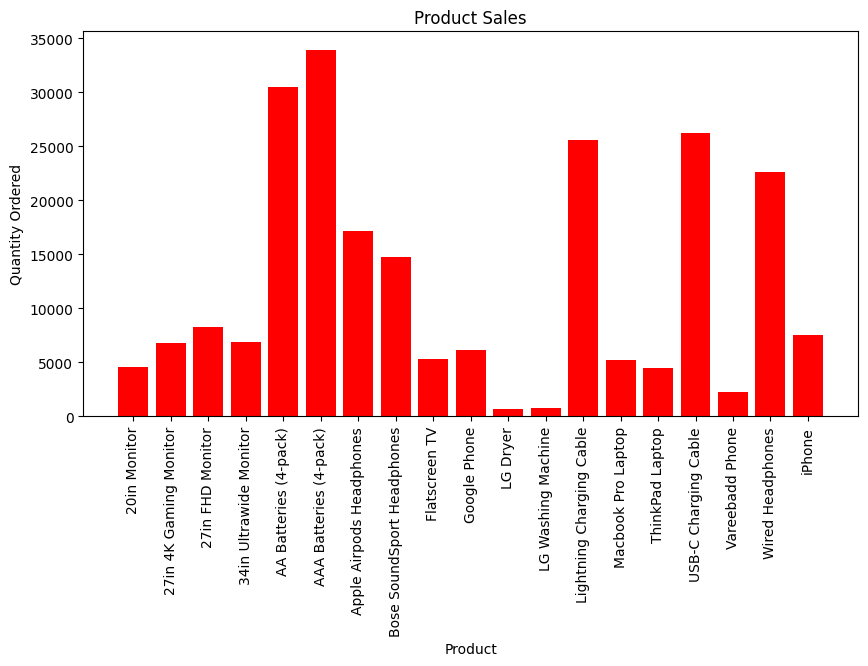

In [152]:
#visualize order quanity and products
plt.figure(figsize=(10,5))
plt.bar(order_quantity.index, order_quantity, color='red')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Product Sales')
plt.show()
